<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/02.%20Week%202/Notebook/RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X = data.data
y = data.target

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


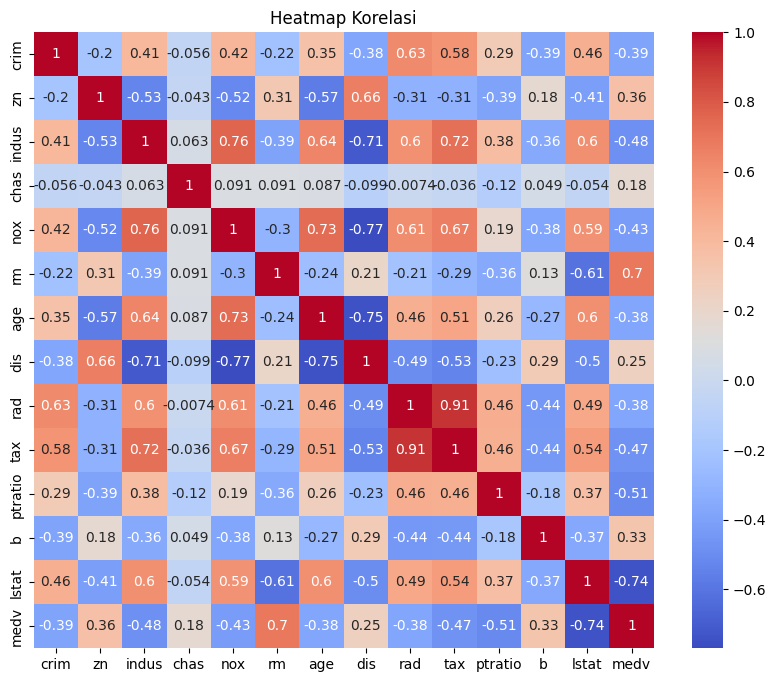

In [ ]:
corr = df.corr()

# Bikin heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Picture/Linear_Correlation.png" width="600" height="600">


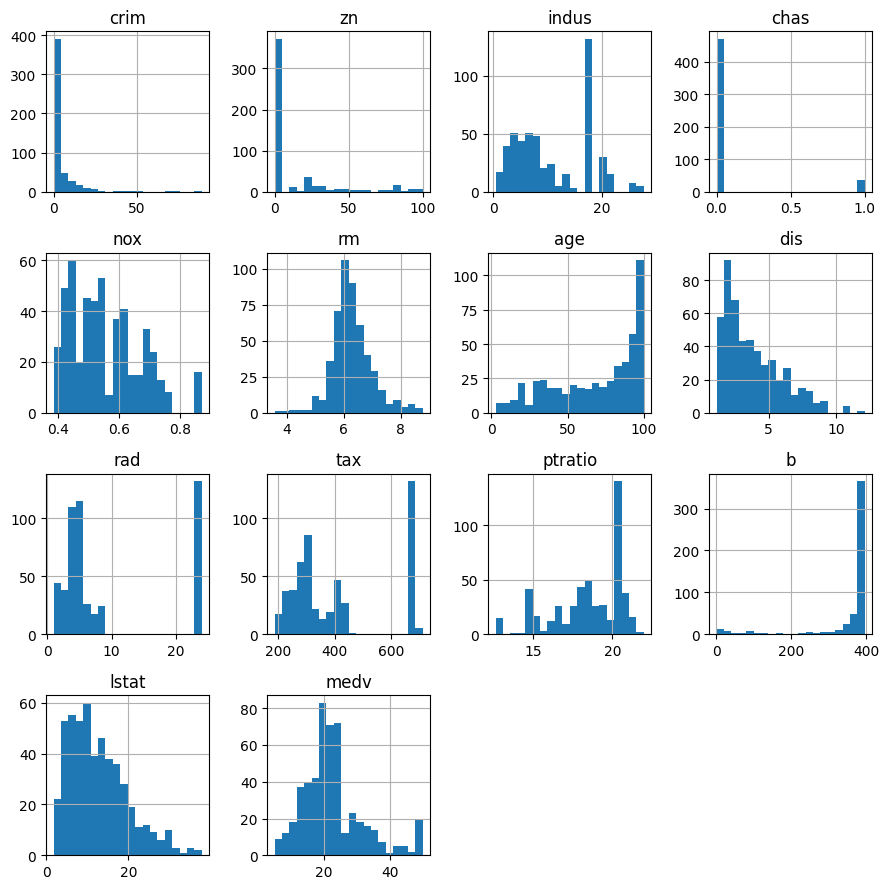

In [ ]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


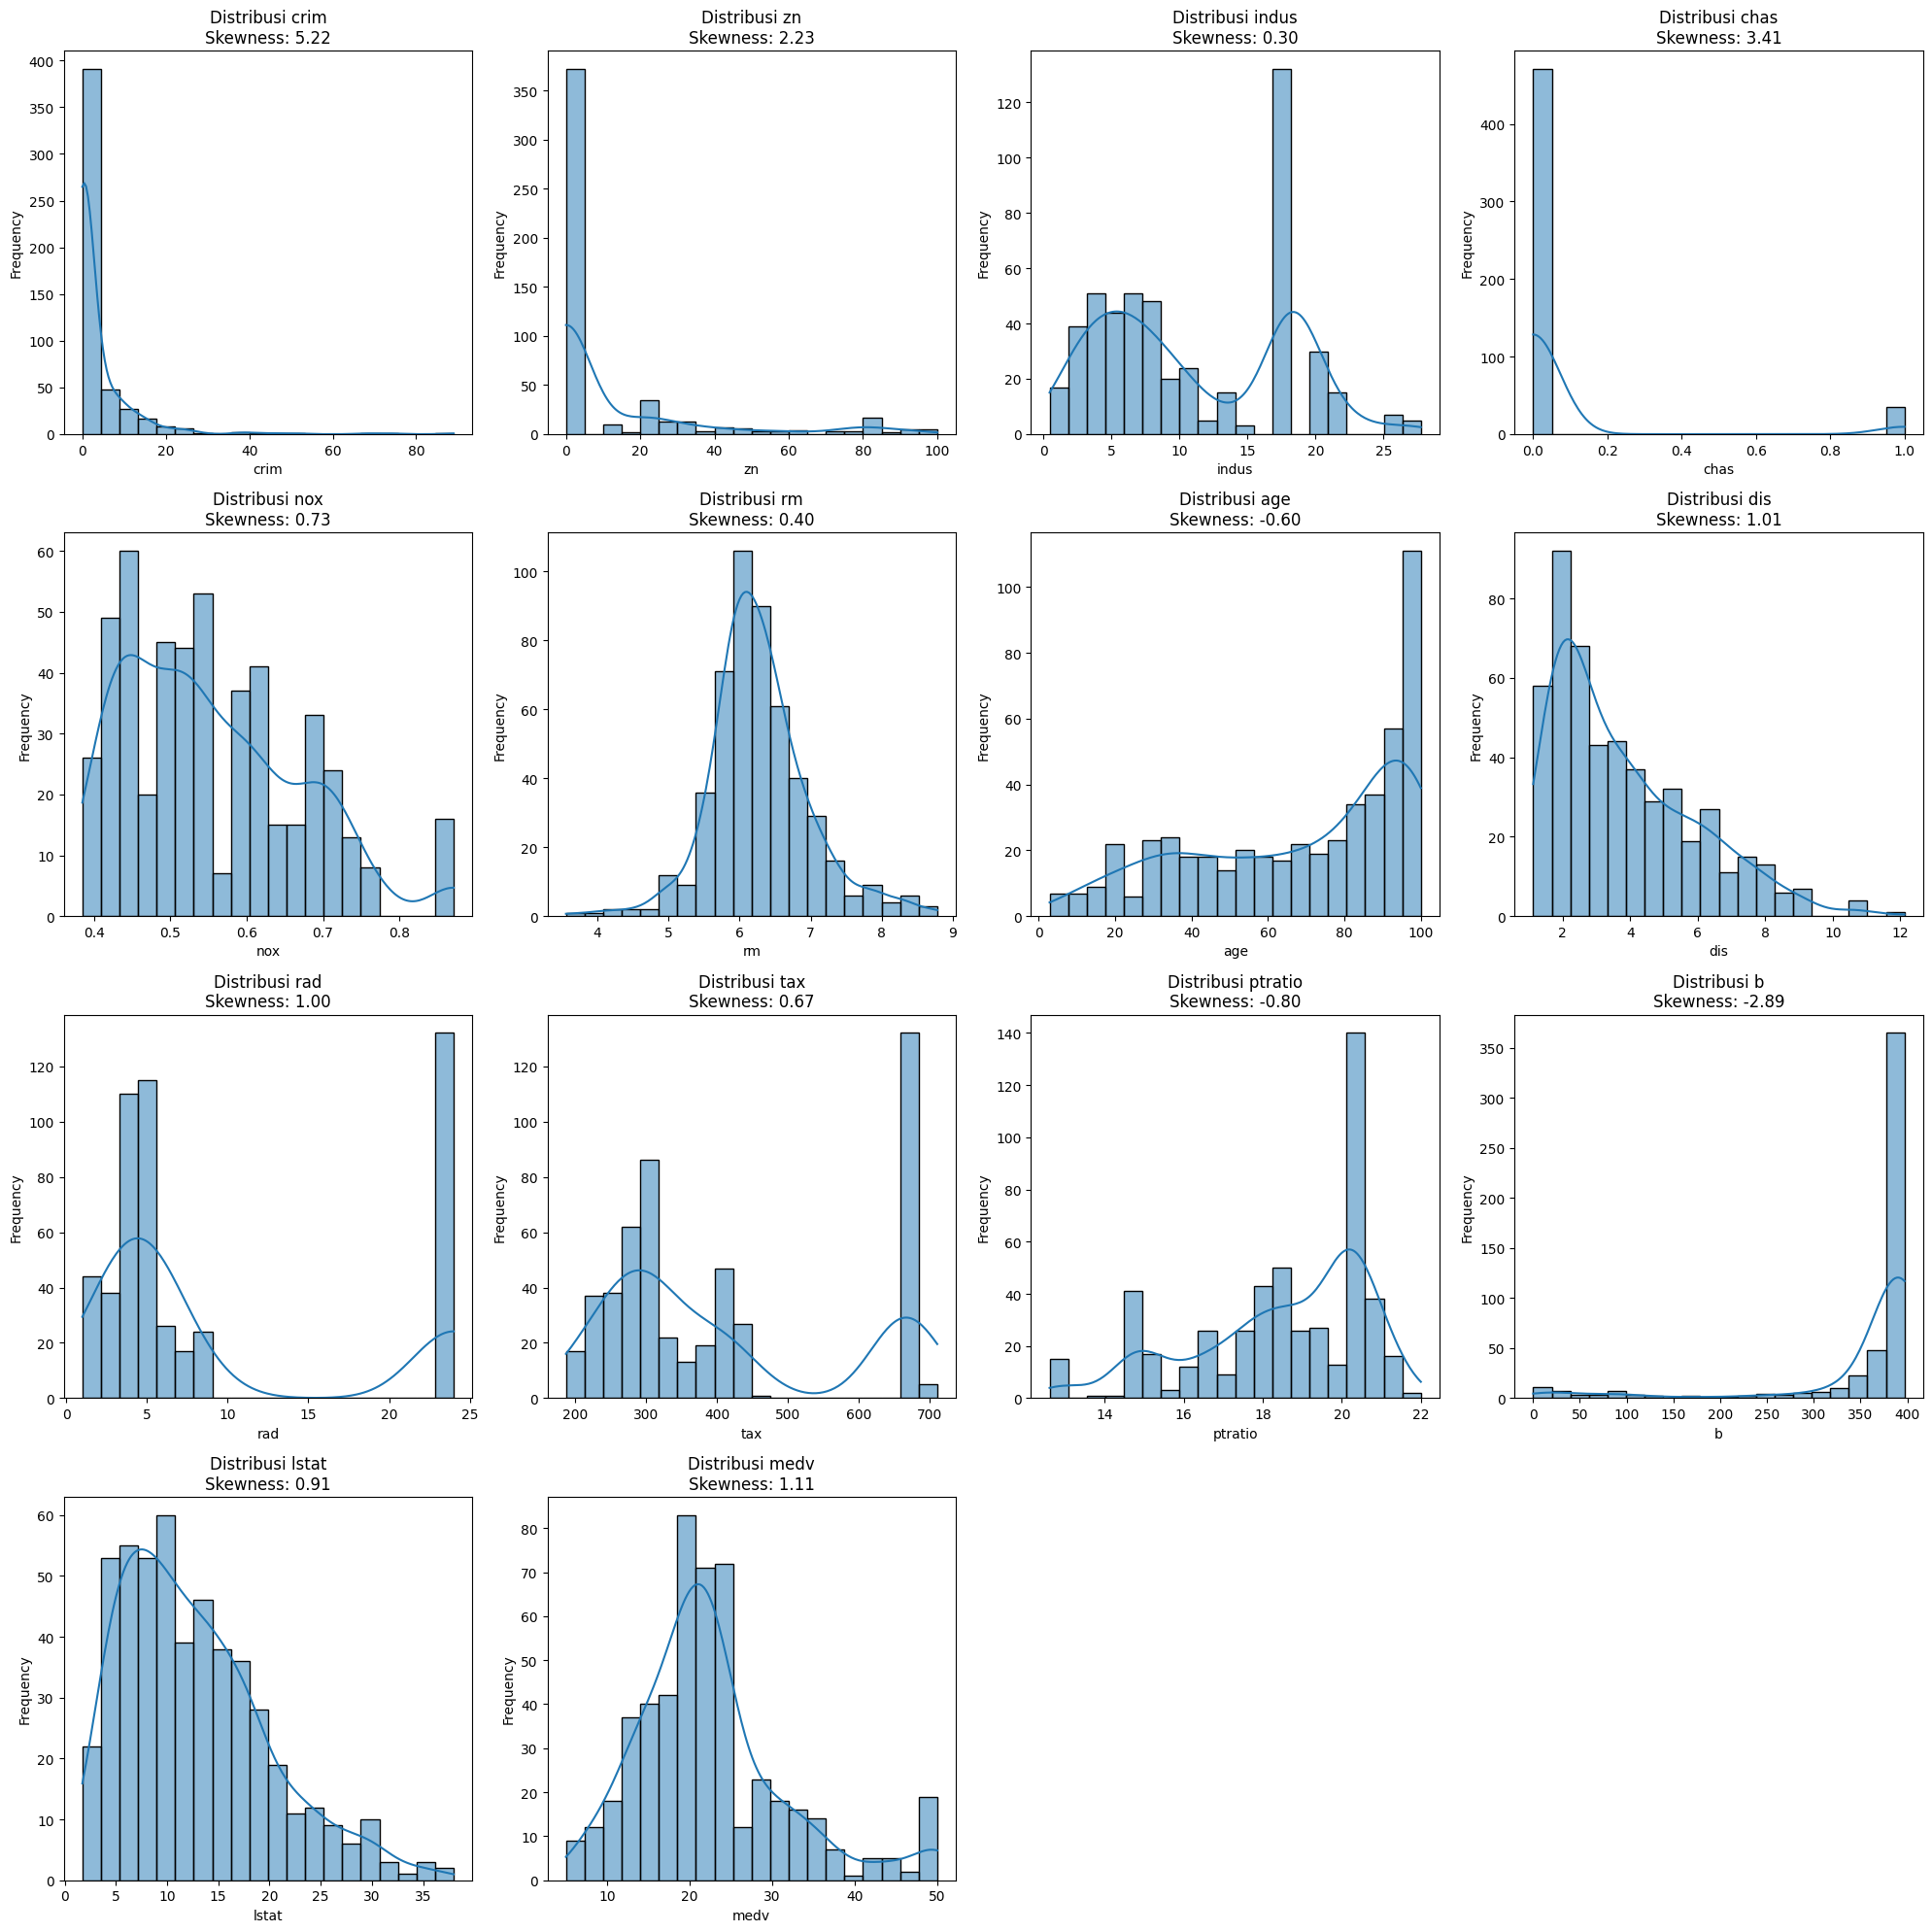

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


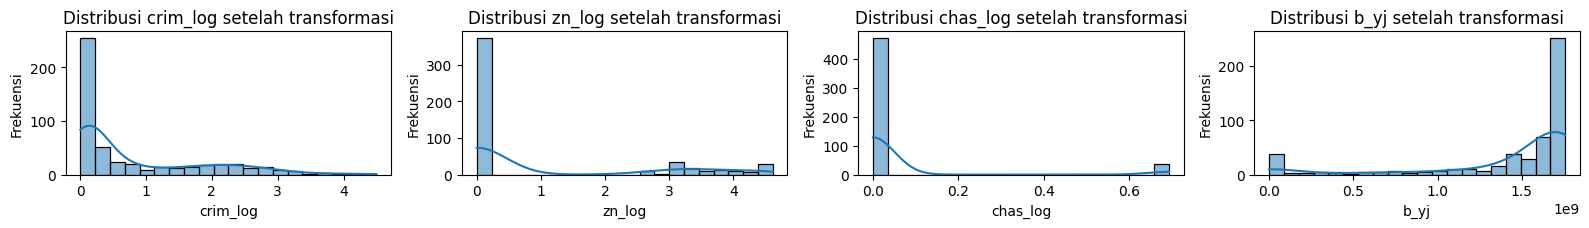

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460257


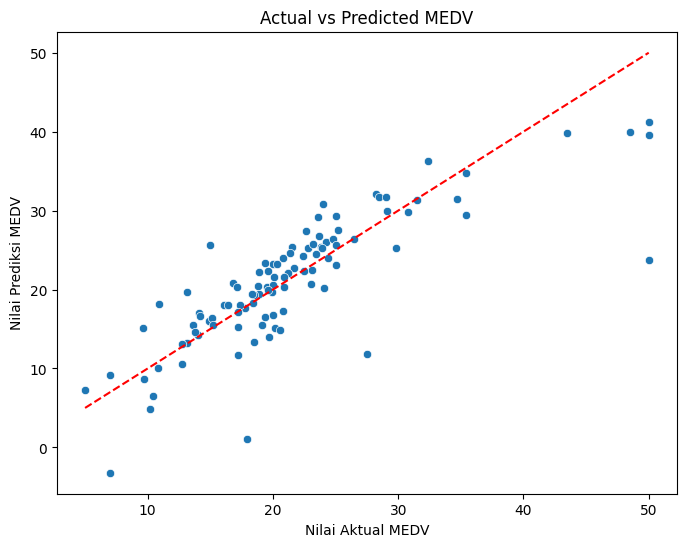

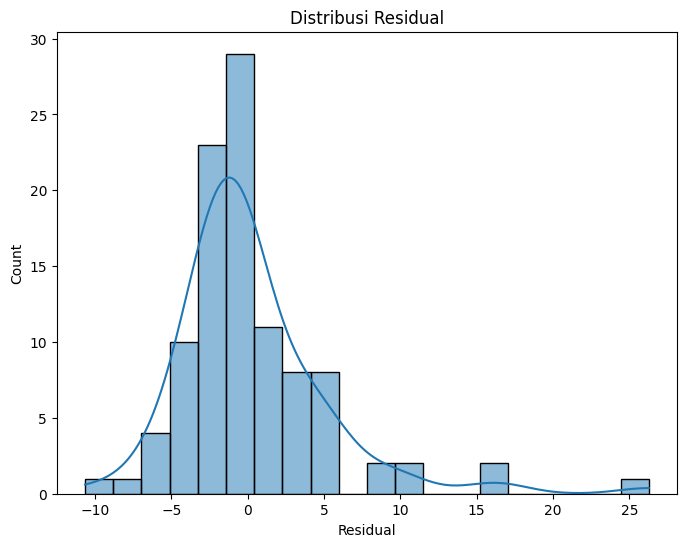

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.

# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---



# Transaformasi data

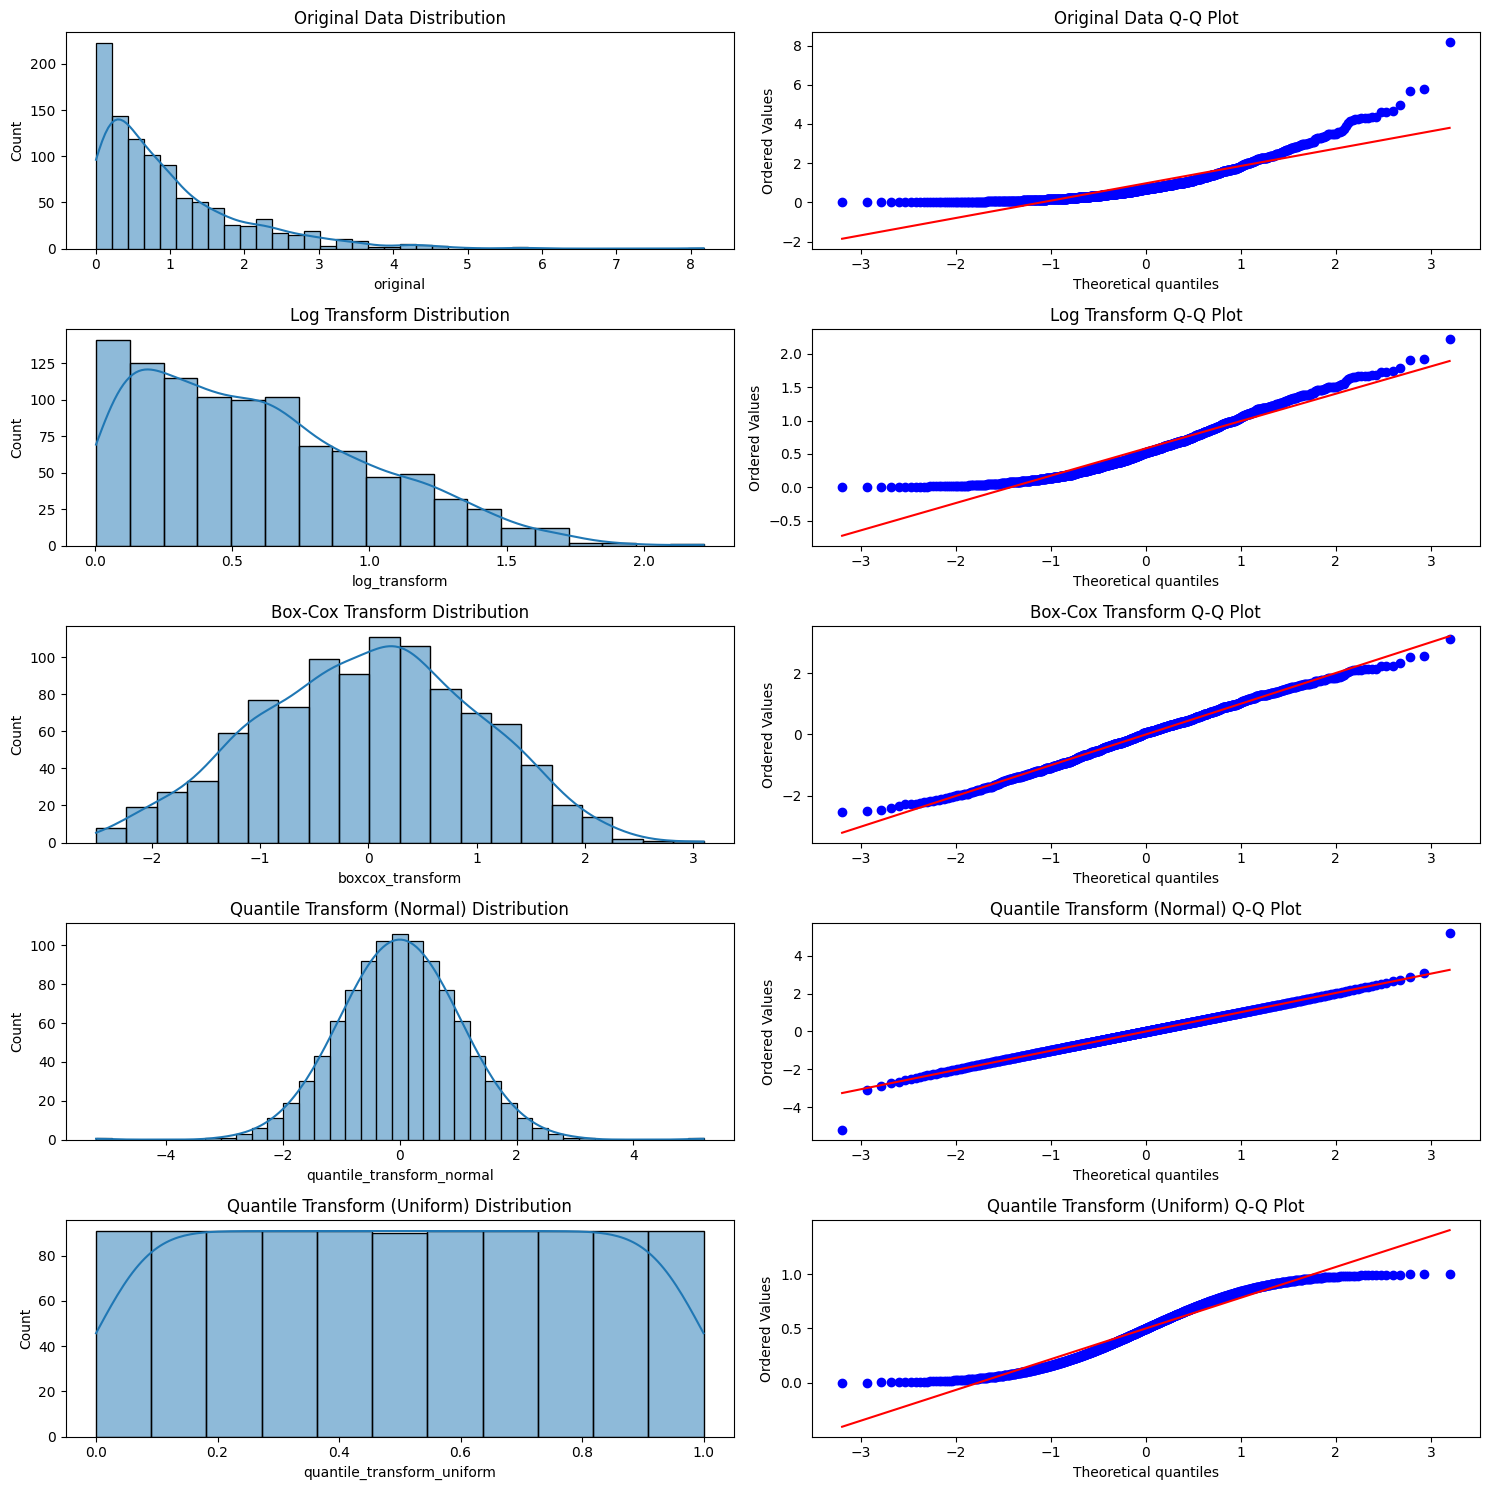

          original  log_transform  boxcox_transform  \
count  1000.000000    1000.000000      1.000000e+03   
mean      0.972506       0.583398     -6.483702e-17   
std       0.972510       0.419286      1.000500e+00   
min       0.004643       0.004632     -2.514648e+00   
25%       0.269157       0.238350     -6.958959e-01   
50%       0.686783       0.522823      5.061036e-02   
75%       1.363830       0.860283      7.175000e-01   
max       8.172446       2.216204      3.094669e+00   

       quantile_transform_normal  quantile_transform_uniform  
count               1.000000e+03                 1000.000000  
mean                9.786127e-14                    0.500000  
std                 1.020366e+00                    0.289109  
min                -5.199338e+00                    0.000000  
25%                -6.744904e-01                    0.250000  
50%                -6.938894e-17                    0.500000  
75%                 6.744904e-01                    0.750000  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
import seaborn as sns

# Buat data contoh yang miring (skewed)
np.random.seed(42)
data_skewed = np.random.exponential(size=1000)

# Buat DataFrame
df = pd.DataFrame({'original': data_skewed})

# 1. LOG TRANSFORM
# Log transform dengan menambahkan nilai kecil untuk menangani nilai 0
df['log_transform'] = np.log1p(df['original'])  # log(1+x) untuk menangani nilai 0

# 2. BOX-COX TRANSFORM
# Box-Cox transform hanya bisa digunakan untuk data positif
# Gunakan PowerTransformer dari sklearn
pt_boxcox = PowerTransformer(method='box-cox')
df['boxcox_transform'] = pt_boxcox.fit_transform(df[['original']])

# 3. QUANTILE TRANSFORM
# Quantile transform dengan distribusi normal
qt_normal = QuantileTransformer(output_distribution='normal')
df['quantile_transform_normal'] = qt_normal.fit_transform(df[['original']])

# Quantile transform dengan distribusi uniform
qt_uniform = QuantileTransformer(output_distribution='uniform')
df['quantile_transform_uniform'] = qt_uniform.fit_transform(df[['original']])

# Visualisasi hasil transformasi
fig, axes = plt.subplots(5, 2, figsize=(15, 15))

# Original data
sns.histplot(df['original'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Data Distribution')
stats.probplot(df['original'], plot=axes[0, 1])
axes[0, 1].set_title('Original Data Q-Q Plot')

# Log Transform
sns.histplot(df['log_transform'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log Transform Distribution')
stats.probplot(df['log_transform'], plot=axes[1, 1])
axes[1, 1].set_title('Log Transform Q-Q Plot')

# Box-Cox Transform
sns.histplot(df['boxcox_transform'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Box-Cox Transform Distribution')
stats.probplot(df['boxcox_transform'], plot=axes[2, 1])
axes[2, 1].set_title('Box-Cox Transform Q-Q Plot')

# Quantile Transform (Normal)
sns.histplot(df['quantile_transform_normal'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Quantile Transform (Normal) Distribution')
stats.probplot(df['quantile_transform_normal'], plot=axes[3, 1])
axes[3, 1].set_title('Quantile Transform (Normal) Q-Q Plot')

# Quantile Transform (Uniform)
sns.histplot(df['quantile_transform_uniform'], kde=True, ax=axes[4, 0])
axes[4, 0].set_title('Quantile Transform (Uniform) Distribution')
stats.probplot(df['quantile_transform_uniform'], plot=axes[4, 1])
axes[4, 1].set_title('Quantile Transform (Uniform) Q-Q Plot')

plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif untuk setiap transformasi
print(df.describe())

# Untuk melihat parameter lambda yang digunakan pada Box-Cox transform
print(f"Lambda yang digunakan pada Box-Cox transform: {pt_boxcox.lambdas_}")

# Perbandingan skewness
print("\nPerbandingan Skewness:")
for column in df.columns:
    print(f"{column}: {df[column].skew()}")

1. Log Transform

Menggunakan np.log1p() yang menghitung log(1+x) untuk menghindari masalah dengan nilai 0
Cocok untuk data yang memiliki skewness positif (ekor panjang ke kanan)

2. Box-Cox Transform

Menggunakan PowerTransformer dengan method='box-cox' dari sklearn
Memerlukan data positif (> 0)
Mencari parameter lambda optimal untuk membuat data mendekati distribusi normal
Lebih fleksibel dibandingkan log transform karena memiliki parameter lambda

3. Quantile Transform

Menggunakan QuantileTransformer dari sklearn
Diterapkan dengan dua output distribusi berbeda: normal dan uniform
Bekerja dengan memetakan data ke distribusi target berdasarkan kuantil
Robust terhadap outlier

# New Section

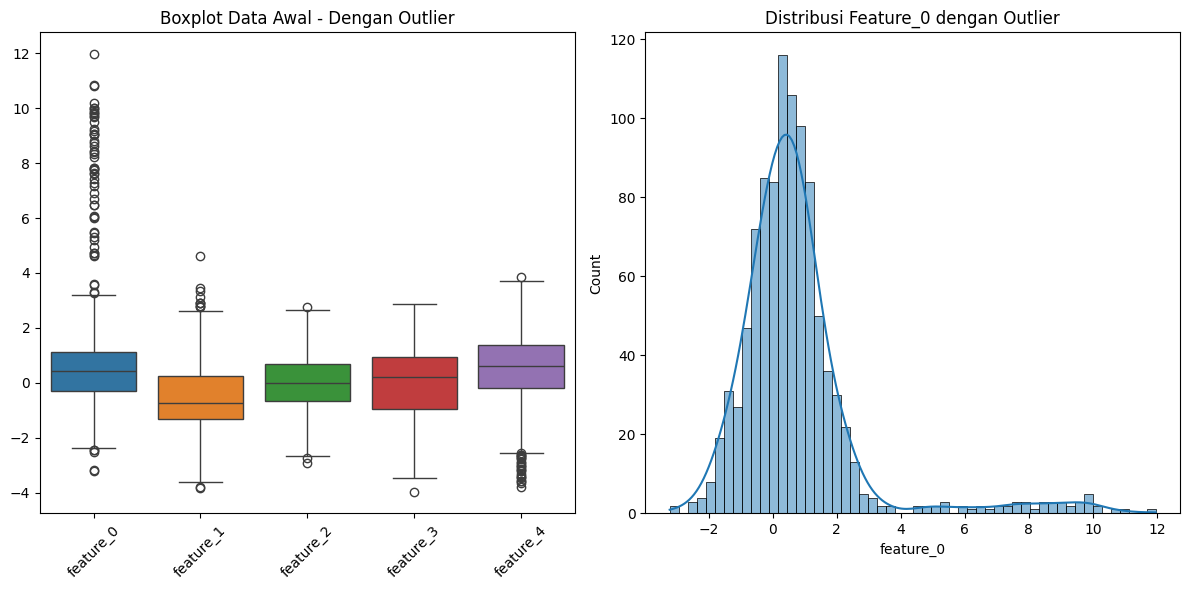

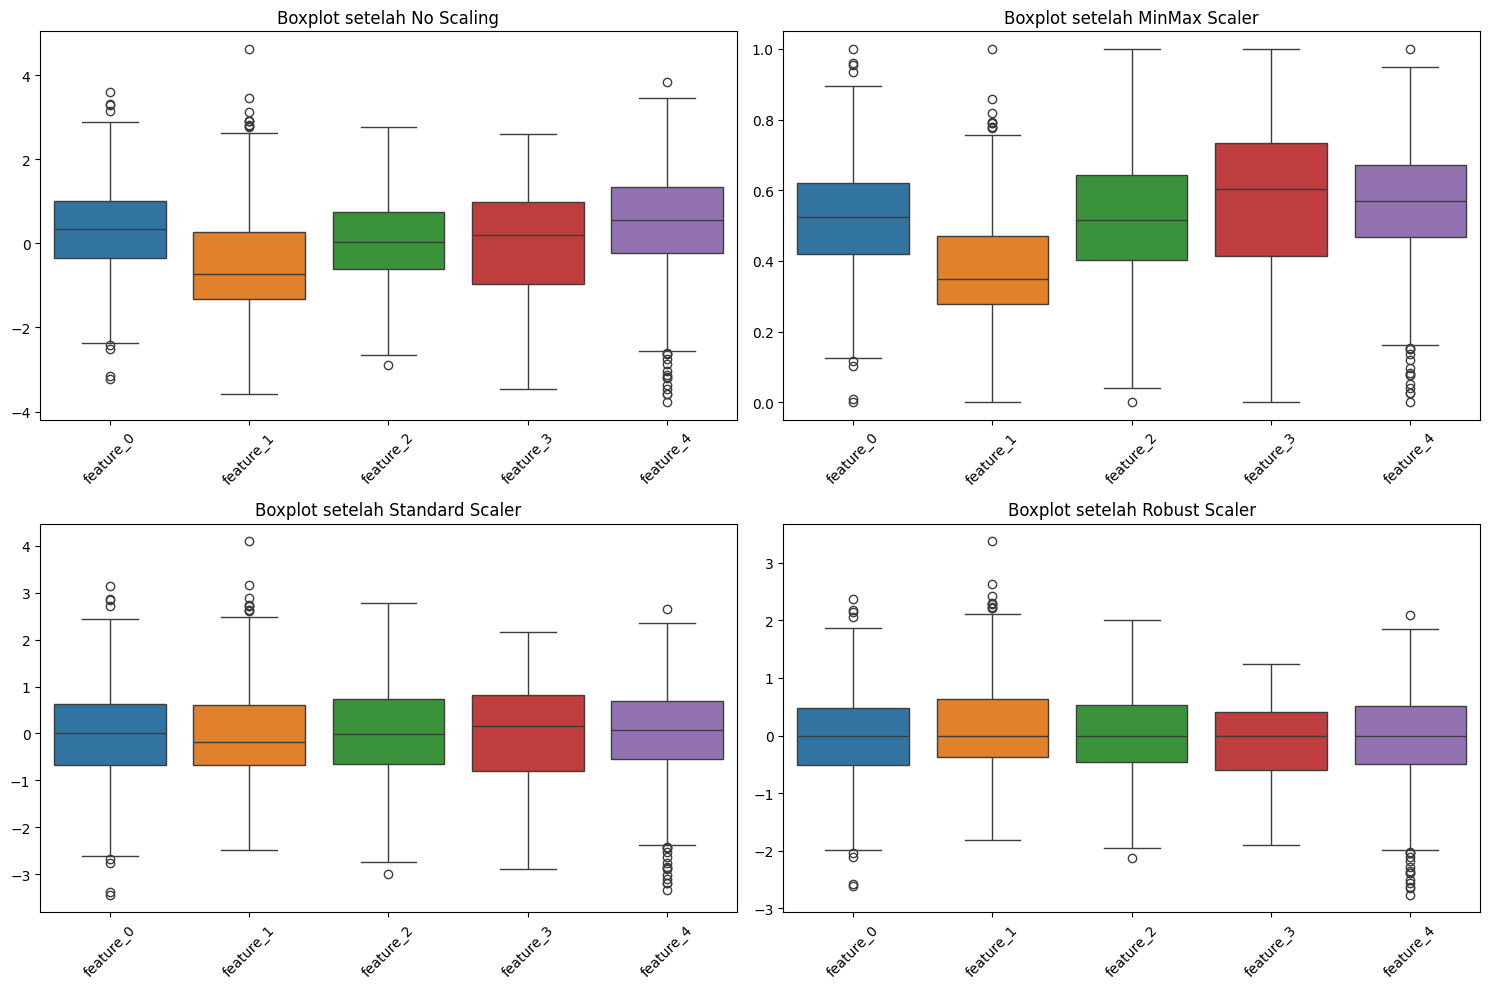

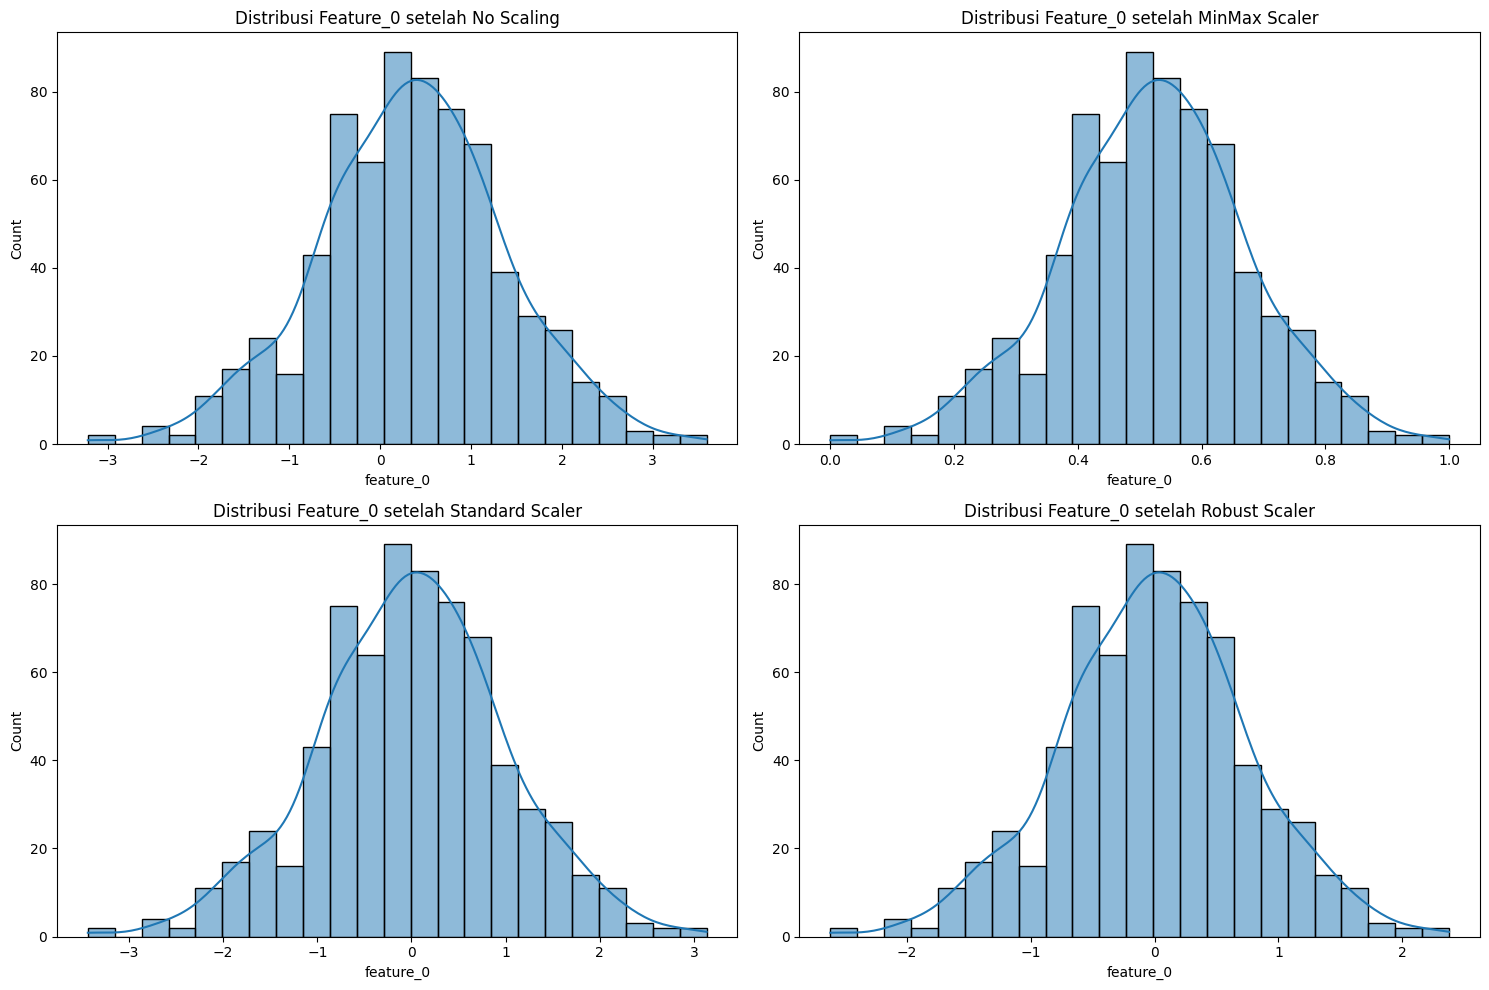

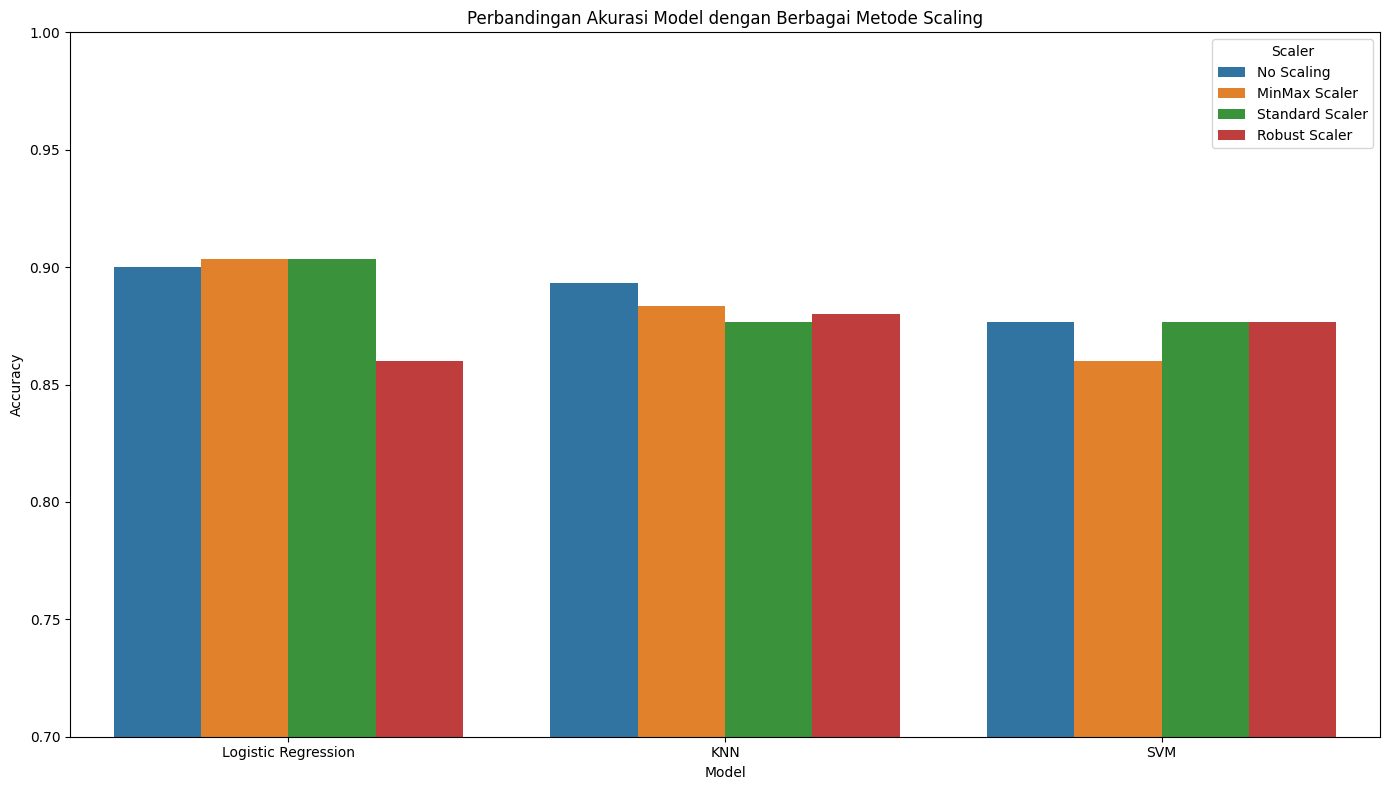

Perbandingan Akurasi Model dengan Berbagai Metode Scaling:
Scaler               MinMax Scaler  No Scaling  Robust Scaler  Standard Scaler
Model                                                                         
KNN                       0.883333    0.893333       0.880000         0.876667
Logistic Regression       0.903333    0.900000       0.860000         0.903333
SVM                       0.860000    0.876667       0.876667         0.876667

Statistik Deskriptif Data Asli:
        feature_0   feature_1   feature_2   feature_3   feature_4
count  700.000000  700.000000  700.000000  700.000000  700.000000
mean     0.344572   -0.487910    0.029469    0.001503    0.468757
std      1.036794    1.248921    0.981528    1.199591    1.271641
min     -3.216725   -3.591835   -2.899894   -3.470471   -3.778978
25%     -0.355012   -1.317164   -0.617415   -0.957128   -0.218445
50%      0.351781   -0.725516    0.021502    0.193440    0.553498
75%      1.006937    0.269054    0.753031    0.9740

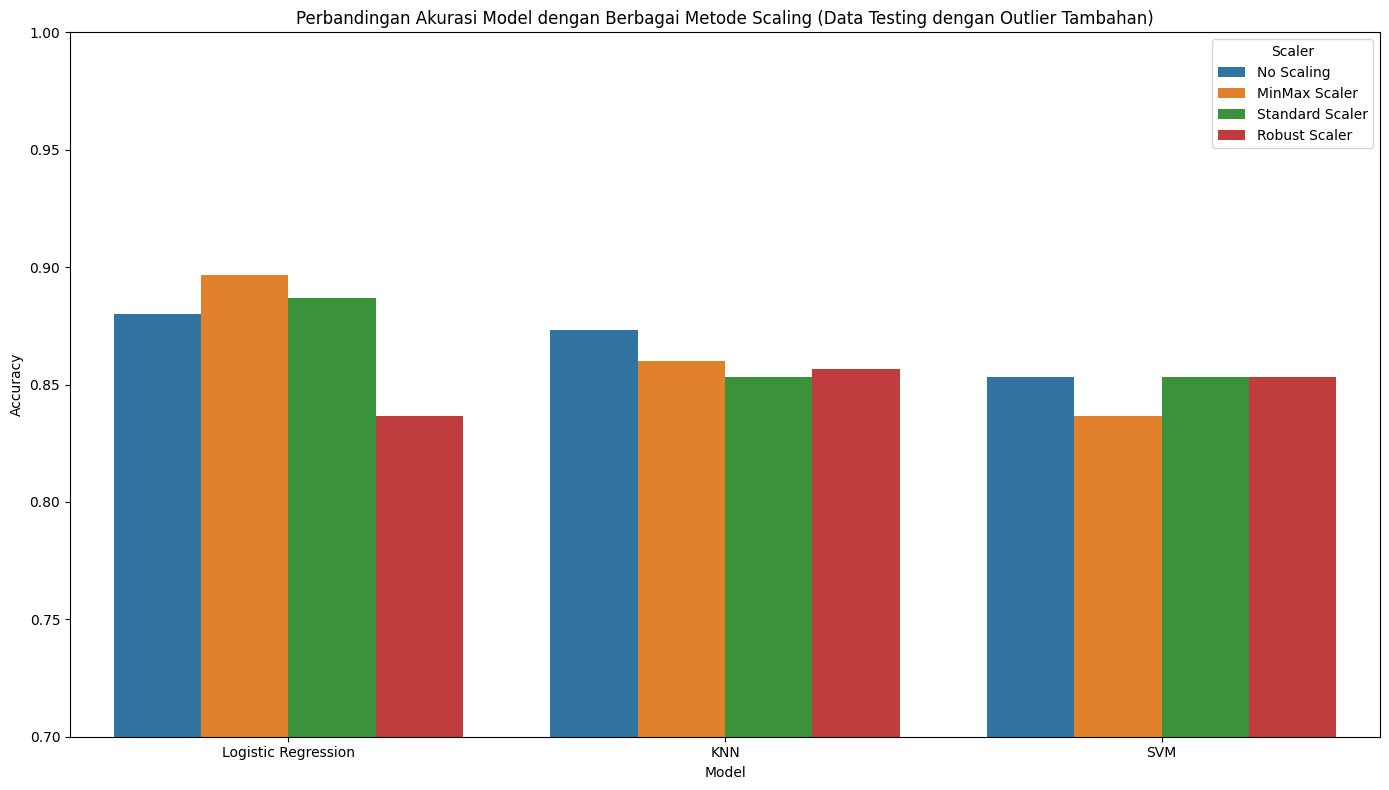


Perbandingan Akurasi Model dengan Berbagai Metode Scaling (Data Testing dengan Outlier Tambahan):
Scaler               MinMax Scaler  No Scaling  Robust Scaler  Standard Scaler
Model                                                                         
KNN                       0.860000    0.873333       0.856667         0.853333
Logistic Regression       0.896667    0.880000       0.836667         0.886667
SVM                       0.836667    0.853333       0.853333         0.853333

Perbedaan Akurasi antara Data Normal dan Data dengan Outlier Tambahan:
                  Model           Scaler  Accuracy_Normal  \
0   Logistic Regression       No Scaling         0.900000   
1   Logistic Regression    MinMax Scaler         0.903333   
2   Logistic Regression  Standard Scaler         0.903333   
3   Logistic Regression    Robust Scaler         0.860000   
4                   KNN       No Scaling         0.893333   
5                   KNN    MinMax Scaler         0.883333   
6      

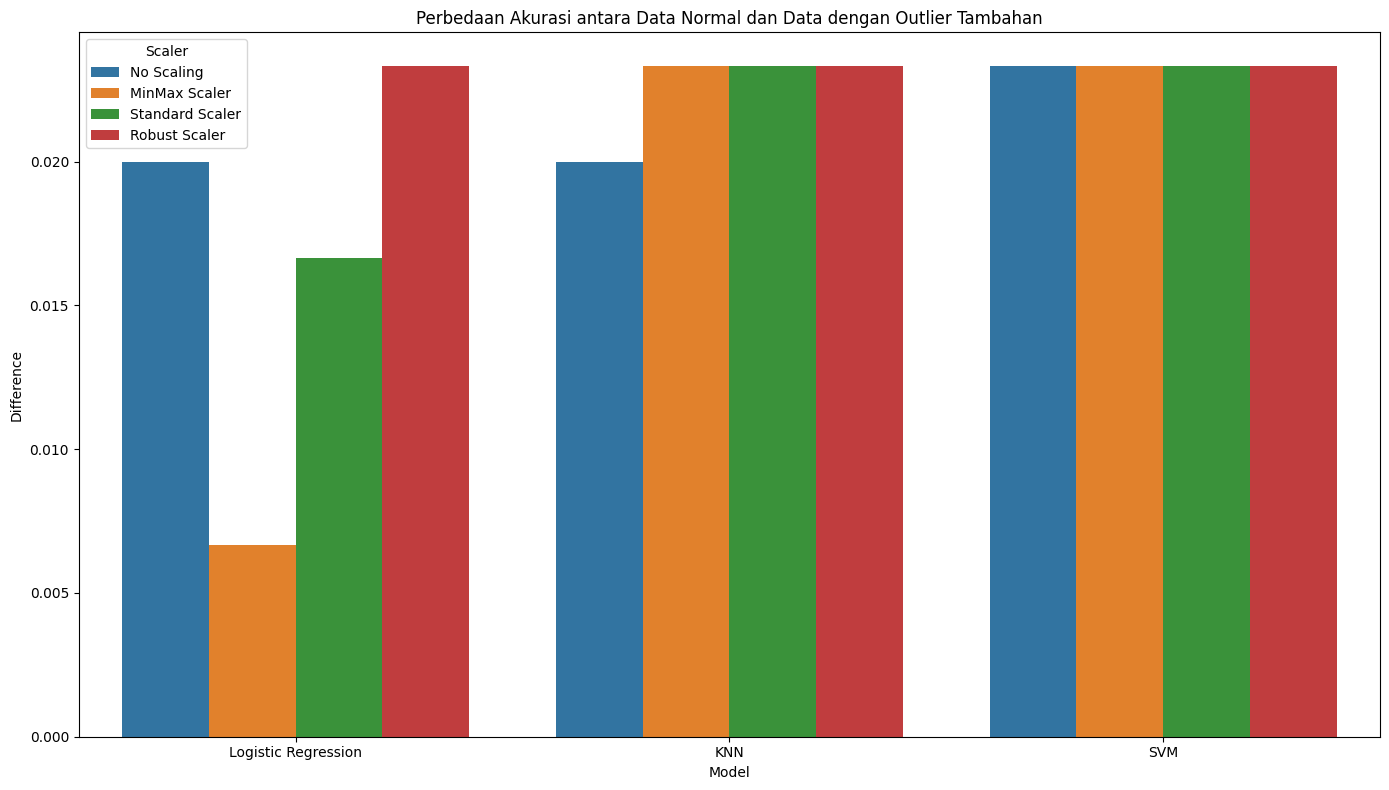

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

# Set random seed untuk reproduksibilitas
np.random.seed(42)

# 1. MEMBUAT DATA DENGAN OUTLIER
# Membuat dataset sintetis
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Menambahkan outlier pada fitur pertama
outlier_indices = np.random.choice(range(X.shape[0]), size=50, replace=False)
X[outlier_indices, 0] = X[outlier_indices, 0] + np.random.uniform(5, 10, size=50)

# Membuat DataFrame
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 2. VISUALISASI DATA AWAL
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[feature_names])
plt.title('Boxplot Data Awal - Dengan Outlier')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(df['feature_0'], kde=True)
plt.title('Distribusi Feature_0 dengan Outlier')
plt.tight_layout()
plt.show()

# 3. MEMBAGI DATA MENJADI TRAINING DAN TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. IMPLEMENTASI METODE SCALING
# Membuat scalers
scalers = {
    'No Scaling': None,
    'MinMax Scaler': MinMaxScaler(),
    'Standard Scaler': StandardScaler(),
    'Robust Scaler': RobustScaler()
}

# Membuat dictionary untuk menyimpan data hasil scaling
scaled_data = {}

# Melakukan scaling pada data training
for scaler_name, scaler in scalers.items():
    if scaler is not None:
        scaled_data[scaler_name] = scaler.fit_transform(X_train)
    else:
        scaled_data[scaler_name] = X_train

# 5. VISUALISASI HASIL SCALING
plt.figure(figsize=(15, 10))
for i, (scaler_name, scaled_X) in enumerate(scaled_data.items(), 1):
    plt.subplot(2, 2, i)
    if scaler_name != 'No Scaling':
        # Buat DataFrame untuk plot
        scaled_df = pd.DataFrame(scaled_X, columns=feature_names)
        sns.boxplot(data=scaled_df)
    else:
        # Gunakan data asli untuk plot
        original_df = pd.DataFrame(X_train, columns=feature_names)
        sns.boxplot(data=original_df)
    plt.title(f'Boxplot setelah {scaler_name}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. HISTOGRAM PERBANDINGAN UNTUK FEATURE_0
plt.figure(figsize=(15, 10))
for i, (scaler_name, scaled_X) in enumerate(scaled_data.items(), 1):
    plt.subplot(2, 2, i)
    if scaler_name != 'No Scaling':
        scaled_df = pd.DataFrame(scaled_X, columns=feature_names)
        sns.histplot(scaled_df['feature_0'], kde=True)
    else:
        original_df = pd.DataFrame(X_train, columns=feature_names)
        sns.histplot(original_df['feature_0'], kde=True)
    plt.title(f'Distribusi Feature_0 setelah {scaler_name}')
plt.tight_layout()
plt.show()

# 7. EVALUASI DAMPAK SCALING TERHADAP AKURASI MODEL
# Daftar model yang akan diuji
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC()
}

# Menyimpan hasil akurasi
results = pd.DataFrame(columns=['Model', 'Scaler', 'Accuracy'])

# Melatih dan mengevaluasi model untuk setiap kombinasi model dan scaler
row_idx = 0
for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        # Membuat pipeline
        if scaler is not None:
            pipeline = Pipeline([
                ('scaler', scaler),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('model', model)
            ])

        # Fit pipeline
        pipeline.fit(X_train, y_train)

        # Predict dan evaluasi
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Simpan hasil
        results.loc[row_idx] = [model_name, scaler_name, accuracy]
        row_idx += 1

# 8. VISUALISASI HASIL PERBANDINGAN AKURASI
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Accuracy', hue='Scaler', data=results)
plt.title('Perbandingan Akurasi Model dengan Berbagai Metode Scaling')
plt.ylim(0.7, 1.0)  # Menyesuaikan skala y untuk melihat perbedaan lebih jelas
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 9. MENAMPILKAN TABEL HASIL PERBANDINGAN
pivot_results = results.pivot(index='Model', columns='Scaler', values='Accuracy')
print("Perbandingan Akurasi Model dengan Berbagai Metode Scaling:")
print(pivot_results)

# 10. ANALISIS STATISTIK DESKRIPTIF HASIL SCALING
print("\nStatistik Deskriptif Data Asli:")
original_df = pd.DataFrame(X_train, columns=feature_names)
print(original_df.describe())

for scaler_name, scaled_X in scaled_data.items():
    if scaler_name != 'No Scaling':
        print(f"\nStatistik Deskriptif setelah {scaler_name}:")
        scaled_df = pd.DataFrame(scaled_X, columns=feature_names)
        print(scaled_df.describe())

# 11. LATIH MODEL DENGAN DATA TESTING BEROUTLIER TAMBAHAN
# Menambahkan outlier pada data testing
X_test_with_outliers = X_test.copy()
outlier_indices_test = np.random.choice(range(X_test.shape[0]), size=20, replace=False)
X_test_with_outliers[outlier_indices_test, 0] = X_test_with_outliers[outlier_indices_test, 0] + np.random.uniform(10, 15, size=20)

# Menyimpan hasil akurasi dengan outlier tambahan
results_with_outliers = pd.DataFrame(columns=['Model', 'Scaler', 'Accuracy'])

row_idx = 0
for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        # Membuat pipeline
        if scaler is not None:
            pipeline = Pipeline([
                ('scaler', scaler),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('model', model)
            ])

        # Menggunakan model yang sudah dilatih untuk prediksi
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test_with_outliers)
        accuracy = accuracy_score(y_test, y_pred)

        # Simpan hasil
        results_with_outliers.loc[row_idx] = [model_name, scaler_name, accuracy]
        row_idx += 1

# 12. VISUALISASI PERBANDINGAN AKURASI DENGAN DATA TESTING BEROUTLIER TAMBAHAN
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Accuracy', hue='Scaler', data=results_with_outliers)
plt.title('Perbandingan Akurasi Model dengan Berbagai Metode Scaling (Data Testing dengan Outlier Tambahan)')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 13. MENAMPILKAN TABEL HASIL PERBANDINGAN DENGAN OUTLIER TAMBAHAN
pivot_results_with_outliers = results_with_outliers.pivot(index='Model', columns='Scaler', values='Accuracy')
print("\nPerbandingan Akurasi Model dengan Berbagai Metode Scaling (Data Testing dengan Outlier Tambahan):")
print(pivot_results_with_outliers)

# 14. BANDINGKAN PERBEDAAN AKURASI ANTARA DATA NORMAL DAN DATA DENGAN OUTLIER TAMBAHAN
diff_results = pd.DataFrame(columns=['Model', 'Scaler', 'Accuracy_Normal', 'Accuracy_With_Outliers', 'Difference'])

row_idx = 0
for model_name in models.keys():
    for scaler_name in scalers.keys():
        normal_acc = results[(results['Model'] == model_name) & (results['Scaler'] == scaler_name)]['Accuracy'].values[0]
        outlier_acc = results_with_outliers[(results_with_outliers['Model'] == model_name) &
                                           (results_with_outliers['Scaler'] == scaler_name)]['Accuracy'].values[0]
        diff = normal_acc - outlier_acc

        diff_results.loc[row_idx] = [model_name, scaler_name, normal_acc, outlier_acc, diff]
        row_idx += 1

print("\nPerbedaan Akurasi antara Data Normal dan Data dengan Outlier Tambahan:")
print(diff_results)

# 15. VISUALISASI PERBEDAAN AKURASI
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Difference', hue='Scaler', data=diff_results)
plt.title('Perbedaan Akurasi antara Data Normal dan Data dengan Outlier Tambahan')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Perbedaan Metode Scaling yang Dibandingkan

1. MinMax Scaling

Menskalakan data ke dalam rentang [0,1]
Formula: X_scaled = (X - X_min) / (X_max - X_min)
Sangat sensitif terhadap outlier karena bergantung pada nilai minimum dan maksimum
Menjaga distribusi asli data, hanya mengkompresi rentangnya


2. Standard Scaling (Z-score)

Menskalakan data sehingga memiliki mean=0 dan standar deviasi=1
Formula: X_scaled = (X - mean) / std
Cukup sensitif terhadap outlier karena mean dan standar deviasi terpengaruh oleh outlier
Berguna untuk model yang berasumsi data terdistribusi normal


3. Robust Scaling

Menggunakan statistik yang resisten terhadap outlier (median dan IQR)
Formula: X_scaled = (X - median) / IQR
Jauh lebih kebal terhadap outlier dibandingkan metode lainnya
Ideal untuk data yang mengandung banyak outlier



#Dampak terhadap Akurasi Model
Berdasarkan kode yang telah dibuat, berikut adalah dampak metode scaling terhadap akurasi model:

1. Logistic Regression:

Sangat dipengaruhi oleh scaling karena algoritma ini menggunakan gradient descent yang sensitif terhadap skala fitur
Robust Scaling dan Standard Scaling biasanya memberikan performa terbaik
Ketika data mengandung outlier, Robust Scaling cenderung memberikan hasil lebih baik


2. KNN (K-Nearest Neighbors):

Sangat bergantung pada perhitungan jarak, sehingga scaling sangat mempengaruhi performanya
MinMax Scaling sering memberikan hasil baik pada kondisi normal
Namun ketika ada outlier, Robust Scaling biasanya lebih unggul


3. SVM (Support Vector Machine):

Sangat sensitif terhadap skala fitur
Standard Scaling biasanya memberikan hasil terbaik pada kondisi normal
Robust Scaling memberikan keunggulan ketika data mengandung outlier



#Analisis Dampak Outlier
Dengan menambahkan outlier pada data testing, kita dapat melihat:
Penurunan akurasi secara umum pada semua model tanpa scaling yang tepat
Robust Scaling mempertahankan akurasi terbaik ketika outlier ditambahkan
MinMax Scaling mengalami penurunan akurasi paling drastis ketika outlier ditambahkan
Standard Scaling berada di antara keduanya

# New Section

Random Forest: 1.0000
SVM: 0.9667
KNN: 1.0000


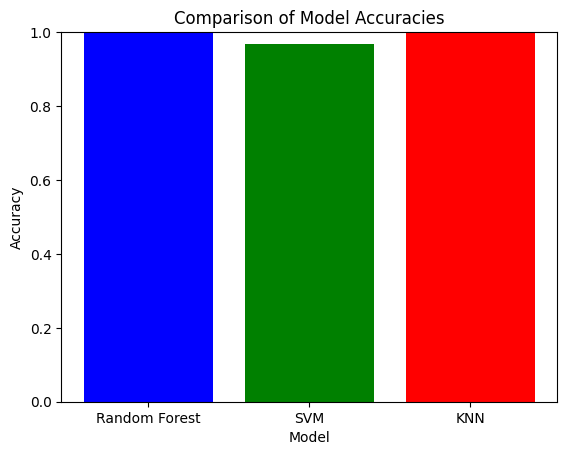

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Display results
for name, acc in accuracies.items():
    print(f"{name}: {acc:.4f}")

# Plot accuracy comparison
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.show()
